##CART(Classification and Regression Tree):
###CART is a supervised learning technique. It adopts a greedy(i.e nonbacktracking) approach in which decision trees are constructed in a top down recursive divide and conquer manner. Thus it is a very interpretable model.
###The algorithm takes a dataset D and the output is a decision tree. The attribute list of the dataset is observed and based on certain measures called the attribute selection measures, we partition the dataset into individual classes of the attribute. Then, for each of the class, we once again find a splitting attribute and build a subtree. This process terminates when we obtain tuples all of the same class(of the dependent variable). Here we create a leaf node with the class of the dependent variable obtained. The process also terminates when the attribute list is empty for which we create a leaf node labelled with the majority class in D.
###Let us understand the CART algorithm with an example.
(Taken from the book Data Mining:Concepts and Techniques by Han and Klamber)
###The dataset shown is a set of randomly selected tuples from the AllElectronics customer database:
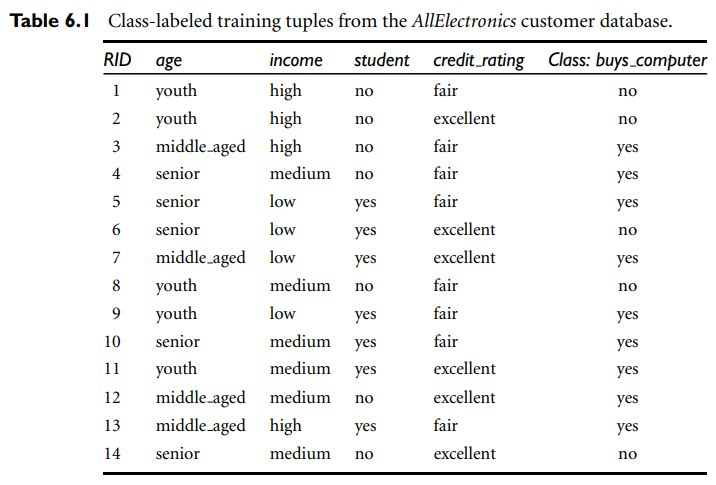
###Now let us build a CART Model for the given dataset


In [5]:
import pandas as pd
df=pd.read_excel('CART.xlsx')
df

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [7]:
#Encode the data i.e. convert non-numerical data to numerical data
import sklearn
from sklearn.preprocessing import LabelEncoder
df['age_n']=LabelEncoder().fit_transform(df['age'])
df['income_n']=LabelEncoder().fit_transform(df['income'])
df['student_n']=LabelEncoder().fit_transform(df['student'])
df['credit_rating_n']=LabelEncoder().fit_transform(df['credit_rating'])
df['buys_computer_n']=LabelEncoder().fit_transform(df['buys_computer'])
df.drop(columns=['age','income','student','credit_rating','buys_computer'],inplace=True)
df

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1
5,6,1,1,1,0,0
6,7,0,1,1,0,1
7,8,2,2,0,1,0
8,9,2,1,1,1,1
9,10,1,2,1,1,1


In [13]:
#Build the decision tree
from sklearn.tree import DecisionTreeClassifier
feature_cols=['age_n','income_n','student_n','credit_rating_n']
x=df[feature_cols]
y=df['buys_computer_n']
dt=DecisionTreeClassifier().fit(x,y)
dt

DecisionTreeClassifier()

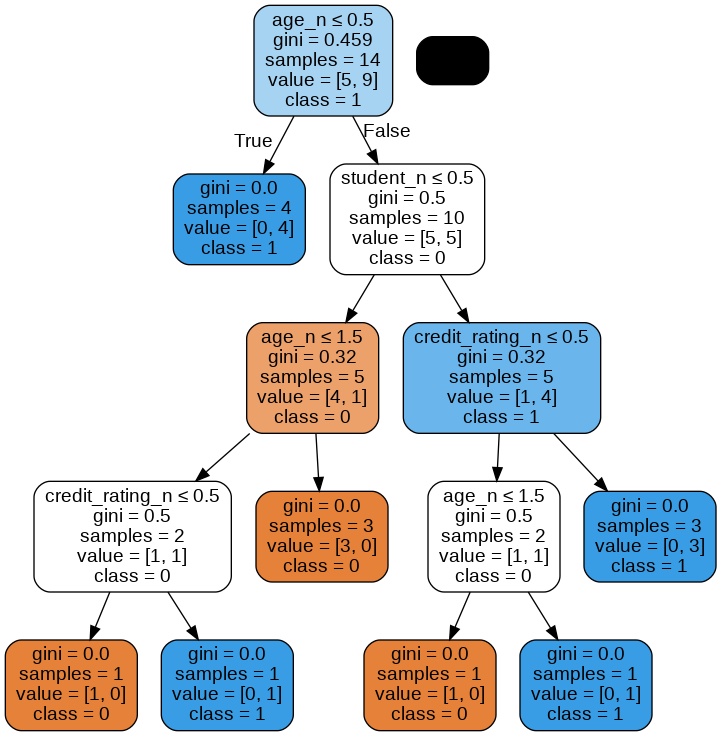

In [20]:
#Visualize the decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,rounded=True,filled=True,special_characters=True,
                feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer.png')
Image(graph.create_png())

In [22]:
"""We saw how to build a decision tree classifier without splitting the dataset into training and 
testing data. Now let us split the dataset"""
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12)
model=DecisionTreeClassifier()
dt1=model.fit(x_train,y_train)
#Check the accuracy of the model
from sklearn import metrics
y_predict=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.75


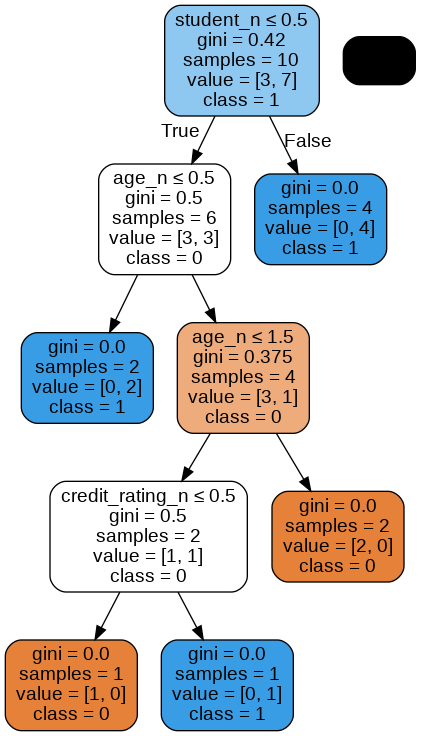

In [23]:
#Visualize the decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(dt1,out_file=dot_data,rounded=True,filled=True,special_characters=True,
                feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer1.png')
Image(graph.create_png())